# Computer Lab 4: Linear Trends
Climate Data Analysis, ATS 301, Fall 2018					

Primary objectives for today:
Calculate and plot linear trends for the time series. 


As before, we start by specifing that we want plots to be displayed inside the Jupyter Notebook, and import the modules we'll need.

This time, we want to do linear regression, so we'll add the `scipy` module. We don't need all of it, so we just import the `stats` package.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Read in one of the time series.

In [2]:
gistemp=np.genfromtxt("/data/ATS_301/Data/GLB.Ts_dSST_2018_Sept.csv",delimiter=',', skip_header=2)

Plot the data to make sure it's what we want.

Text(0.5,1,'Global Mean Estimates based on Land and Ocean Data (GISTEMP)')

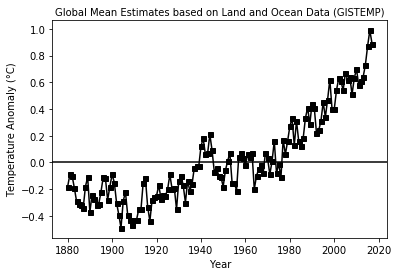

In [3]:
plt.plot(gistemp[:,0],gistemp[:,13],'sk-',markersize=5)
plt.axhline(color='k')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)

Save the citation info:

+ GISTEMP Team, 2018: GISS Surface Temperature Analysis (GISTEMP). NASA Goddard Institute for Space Studies. Dataset accessed 2018-09-16 at http://data.giss.nasa.gov/gistemp/.
+ Hansen, J., R. Ruedy, M. Sato, and K. Lo, 2010: Global surface temperature change, Rev. Geophys., 48, RG4004, doi:10.1029/2010RG000345. 

## Linear regression##

While there are many ways in python to do linear regression, we'll be using the basic function included in the module `scipy`. As with any new function, you should start by looking at the `help` output to get a general overview of the function, its inputs, its outputs, and options.

In [4]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

So let's try calculating the slope, etc., for the whole time series. 

<b>NOTE</b>: Because the 2018s values in our array are nan's, we need to exclude those from the linear regression. When subscripting arrays, **using a negative number means to count from the end**. So, specifying -1 as the "stop" value in an array subset means we include the second to last value.

In [5]:
stats.linregress(gistemp[0:-1,0],gistemp[0:-1,13])

LinregressResult(slope=0.0071928747068990325, intercept=-13.988069989581172, rvalue=0.8670419046942898, pvalue=5.5767462219259004e-43, stderr=0.000354427473346482)

Try leaving off the "-1"'s and see what happens.

In [6]:
stats.linregress(gistemp[0:,0],gistemp[0:,13])

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

Note: if you leave off the *first* number in the array subscripts, it assumes the first subscript is 0. So, we don't really need to include the 0's in this function. However, it is sometimes clearer to specifically include the 0.

This outputs the results, but we would like to save these values. To do this, we specify the output variables for the function as is done in the example for the help command.

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gistemp[:-1,0],gistemp[:-1,13])

We want to add this regression line to the plot. To do this, we create a new variable that has the trend line y value for every year.  We are essentially creating a 1-D array with the <em>y</em> values from the *y=a+bx* linear equation.

In [8]:
trend_line = intercept + slope*gistemp[:-1,0]

Now we can plot this line on the same graph as the GISTEMP data:

Text(0.5,1,'Global Mean Estimates based on Land and Ocean Data (GISTEMP)')

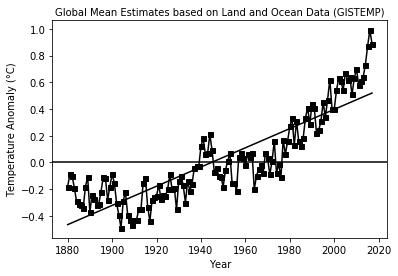

In [9]:
plt.plot(gistemp[:,0],gistemp[:,13],'sk-',markersize=5)
plt.plot(gistemp[:-1,0],trend_line,'k')
plt.axhline(color='k')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)

Does this look like the linear trend is a good fit to the data?

I would like to calculate the slope for the second half of the 20th Century.  Figure out what starting and ending indices to use to include this period. Print out the `gistemp` year values in this range to confirm.

In [ ]:
# Replace the X's below:

print(gistemp[XXXXXX:XXXXXX,0])

In [10]:
# 
print(gistemp[70:120,0])

[1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999.]



Now use the data in this range to calculate a new slope.  We still want to keep the original values, so we need to use new variables for this time period.  Here, I'll add `_1950_1999` to the end of the original variable names. This way, I can look at the name of my variable and know which years it includes. 


In [ ]:
# Fill in the indices below

slope_1950_1999, intercept_1950_1999, r_value_1950_1999, p_value_1950_1999, std_err_1950_1999 = stats.linregress(gistemp[XXXX:XXXX,XXXX],gistemp[XXXX:XXX,XXXX])

trend_line_1950_1999 = intercept_1950_1999 + slope_1950_1999*gistemp[XXX:XXX,XXX]

In [1]:
#
slope_1950_1999, intercept_1950_1999, r_value_1950_1999, p_value_1950_1999, std_err_1950_1999 = stats.linregress(gistemp[70:120,0],gistemp[70:120,13])

trend_line_1950_1999 = intercept_1950_1999 + slope_1950_1999*gistemp[70:120,0]

NameError: name 'stats' is not defined

And then plot the data...

In [ ]:
plt.plot(gistemp[:,0],gistemp[:,13],'sk-',markersize=5)
plt.plot(gistemp[:-1,0],trend_line,'k')
plt.plot(gistemp[70:120,0],trend_line_1950_1999,'r')
plt.axhline(color='k')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)
plt.show()

Now, add a legend to the plot. To do this, we need to `label` all of the data in the `plt.plot` function, and then add the `plt.legend()` function.

Note that we need to specify the `()` in the legend function. This indicates to python that this is a function, even if the function has no arguments.  **All functions have to have `()`.**

In [ ]:
plt.plot(gistemp[:,0],gistemp[:,13],'sk-',markersize=5,label="Annual data")
plt.plot(gistemp[:-1,0],trend_line,'k',label="All-year trend")
plt.plot(gistemp[70:120,0],trend_line_1950_1999,'r',label="1950-99 trend")
plt.axhline(color='k')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)
plt.legend()
plt.show()

In [ ]:
help(plt.legend)

If you want to specify where the legend will go (for example, to make sure the legend doesn't cover the data), add the `loc` option to the `legend` command.  This specifies the lower right corner (see the help command for more).


In [ ]:
plt.plot(gistemp[:,0],gistemp[:,13],'sk-',markersize=5,label="Annual data")
plt.plot(gistemp[:-1,0],trend_line,'k',label="All-year trend")
plt.plot(gistemp[70:120,0],trend_line_1950_1999,'r',label="1950-99 trend")
plt.axhline(color='k')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)
plt.legend(loc=4)
plt.show()

Print out the slope, intercept, etc. You can use a separate `print` statement for each variable.  You can print multiple strings or variable values in one `print` statement by separating them with a comma.

In [ ]:
print('                  all-year           50-year')
print('slope (K/yr): ',slope, slope_1950_1999)
print('intercept (K):',intercept, intercept_1950_1999)
print('p_value: ',p_value, p_value_1950_1999)

But this is sort of messy.  We'd like to make a nice table to make it easy to compare your different slopes.  To put values into a table, you need to use the `format` command and *string replacement*. 

The next `print` commands use *replacement fields* surrounded by curly braces `{}`. Anything that is not contained in braces is considered *literal text*, which is copied unchanged to the output (including spaces).  The braces are replaced by the strings in the `format` function, based on the order of the strings.

In this example, `{0:.4f}` will be replaced by the first value (i.e., index 0) in the `format` command (i.e., `slope`), whereas `{1:.4f}` will be replaced by index 1 in the `format` command. Thus, the first number after the { indicates which variable goes in the space. 

This index is followed by a colon `:`, which indicates that we will be *formatting* the string. `.4f` means a "f"loating point with "4" digits after the decimal ".", and as many points in front of the decimal as we need. `.2e` means "e"xponential notation. Here, we don't need as many digits after the decimal point.

Add spaces inside the `print` command by trial and error to get the columns to line up.

In [ ]:
print('                  all-year           50-year')
print('slope (K/yr):       {0:.4f}          {1:.4f}'.format(slope, slope_1950_1999))
print('intercept (K):    {0:.4f}        {1:.4f}'.format(intercept, intercept_1950_1999))
print('p_value:            {0:.2e}        {1:.2e}'.format(p_value, p_value_1950_1999))